# Stage 3: Autoencoder for Anomaly Detection for IoT 7 and 8

The autoencoder (AE) anomaly detection model used in this project work as follow:
1. we only used the benign data when trianing the AE model 
2. It identify anomalies by trying to recreate the input data
3. When the model fail to create the input with low RMSE, we can conclude that it's an anomaly.

In [1]:
# set all random variables
import os
import numpy as np
import random
import tensorflow as tf

seed_value= 0
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [2]:
#import all required library
import keras
from keras.models import Sequential
from keras import regularizers, Model
from keras.layers import Dense, Input

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from keras import backend

Using TensorFlow backend.


In [3]:
#Define all afunctions: Predict and RMSE

#Create predict function
def predict(mse, treshold):
    prd = []
    for i in mse:
        if i > treshold:
            prd.append(1)
        else: prd.append(0)
            
    return np.asarray(prd)

#Create RMSE function that acccept numpy array
def np_rmse(y_pred, y_true):
    return np.sqrt(np.mean(np.power(y_pred - y_true, 2), axis=1))

#Create RMSE function for Keras model
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

Train the AE model on IoT 8 and 7 benign data

In [4]:
#Load benign data
device8 = pd.read_csv("8.benign.csv")
device7 = pd.read_csv("7.benign.csv")

all_benign = pd.concat([device7,device8])
all_benign['label'] = 0

#Split benig data for trianing and testing
all_benign, all_benign_test,_,_ = train_test_split(all_benign.iloc[:,:-1].values, 
                                all_benign.iloc[:,-1].values, test_size=0.5, random_state=42)

#Scale training data
scaler = StandardScaler()
scaler.fit(all_benign)
all_benign = scaler.transform(all_benign)

In [5]:
#create keras model
input_layer = Input(shape=(all_benign.shape[1],))
encoded = Dense(110, activation='relu', activity_regularizer=regularizers.l1_l2(l1=10e-6, l2=10e-6))(input_layer)
encoded = Dense(95, activation='relu')(encoded)
encoded = Dense(20)(encoded)
decoded = Dense(95, activation='relu')(encoded)
decoded = Dense(110, activation='relu')(decoded)
output_layer = Dense(all_benign.shape[1])(decoded)

autoencoder = Model(input_layer, output_layer)
encoder = Model(input_layer, encoded)
autoencoder.compile(optimizer= 'adadelta', loss=rmse)

# fit the model
autoencoder.fit(all_benign, all_benign, batch_size = 100, epochs = 390, validation_split = 0.20)

Train on 39493 samples, validate on 9874 samples
Epoch 1/390
39493/39493 [==============================] - 2s 46us/step - loss: 0.3741 - val_loss: 0.2429
Epoch 2/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.2185 - val_loss: 0.1867
Epoch 3/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.1696 - val_loss: 0.1406
Epoch 4/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.1468 - val_loss: 0.1351
Epoch 5/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.1335 - val_loss: 0.1277
Epoch 6/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.1235 - val_loss: 0.1191
Epoch 7/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.1160 - val_loss: 0.1142
Epoch 8/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.1102 - val_loss: 0.1031
Epoch 9/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.1045 - val_loss: 0.10

39493/39493 [==============================] - 1s 34us/step - loss: 0.0466 - val_loss: 0.0496
Epoch 154/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0463 - val_loss: 0.0474
Epoch 155/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0464 - val_loss: 0.0449
Epoch 156/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0462 - val_loss: 0.0482
Epoch 157/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0461 - val_loss: 0.0539
Epoch 158/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0459 - val_loss: 0.0438
Epoch 159/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0460 - val_loss: 0.0456
Epoch 160/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0459 - val_loss: 0.0471
Epoch 161/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0462 - val_loss: 0.0478
Epoch 162/390
39493/39493 [===============

Epoch 229/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0432 - val_loss: 0.0482
Epoch 230/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0428 - val_loss: 0.0464
Epoch 231/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0430 - val_loss: 0.0411
Epoch 232/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0431 - val_loss: 0.0437
Epoch 233/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0431 - val_loss: 0.0417
Epoch 234/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0429 - val_loss: 0.0423
Epoch 235/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0428 - val_loss: 0.0414
Epoch 236/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0429 - val_loss: 0.0425
Epoch 237/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0427 - val_loss: 0.0432
Epoch 238/390
39493/39493 [=

Epoch 305/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0410 - val_loss: 0.0423
Epoch 306/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0411 - val_loss: 0.0401
Epoch 307/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0410 - val_loss: 0.0424
Epoch 308/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0412 - val_loss: 0.0383
Epoch 309/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0410 - val_loss: 0.0420
Epoch 310/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0410 - val_loss: 0.0444
Epoch 311/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0410 - val_loss: 0.0408
Epoch 312/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0411 - val_loss: 0.0441
Epoch 313/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0409 - val_loss: 0.0430
Epoch 314/390
39493/39493 [=

Epoch 381/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0397 - val_loss: 0.0401
Epoch 382/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0398 - val_loss: 0.0385
Epoch 383/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0396 - val_loss: 0.0411
Epoch 384/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0395 - val_loss: 0.0401
Epoch 385/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0395 - val_loss: 0.0437
Epoch 386/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0396 - val_loss: 0.0394
Epoch 387/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0397 - val_loss: 0.0419
Epoch 388/390
39493/39493 [==============================] - 1s 34us/step - loss: 0.0396 - val_loss: 0.0400
Epoch 389/390
39493/39493 [==============================] - 1s 33us/step - loss: 0.0397 - val_loss: 0.0412
Epoch 390/390
39493/39493 [=

In [6]:
#Load the anomaly data
data70 = pd.read_csv("7.gafgyt.combo.csv")
data71 = pd.read_csv("7.gafgyt.junk.csv")
data72 = pd.read_csv("7.gafgyt.scan.csv")
data73 = pd.read_csv("7.gafgyt.tcp.csv")
data74 = pd.read_csv("7.gafgyt.udp.csv")

data80 = pd.read_csv("8.gafgyt.combo.csv")
data81 = pd.read_csv("8.gafgyt.junk.csv")
data82 = pd.read_csv("8.gafgyt.scan.csv")
data83 = pd.read_csv("8.gafgyt.tcp.csv")
data84 = pd.read_csv("8.gafgyt.udp.csv")
data85 = pd.read_csv("8.mirai.ack.csv")
data86 = pd.read_csv("8.mirai.scan.csv")
data87 = pd.read_csv("8.mirai.syn.csv")
data88 = pd.read_csv("8.mirai.udp.csv")
data89 = pd.read_csv("8.mirai.udpplain.csv")

anomaly = pd.concat([ data70, data71, data72, data73, data74,
                      data80, data81, data82, data83, data84, data85, data86, data87, data88, data89])

column_names = [anomaly .columns.values]

#Scale anomaly data
anomaly = scaler.transform(anomaly)
anomaly = pd.DataFrame(anomaly,columns = column_names)

#label all anomaly data as one
anomaly['label'] = 1

#Scale benign data
all_benign_test = scaler.transform(all_benign_test)
all_benign_test = pd.DataFrame(all_benign_test, columns = column_names)

#label all bnign data as 0
all_benign_test['label'] = 0

#combine benign and anomaly data
test_data = pd.concat([anomaly,all_benign_test])

#Shuffle the combined data
test_data = test_data.sample(frac=1, random_state=42)

#Create the compressed data for other AD model
compressed_data = encoder.predict(test_data.iloc[:,:-1])

compressed_train_data, compressed_test_data,compressed_train_label,compressed_test_label = train_test_split(compressed_data, 
                                                   test_data.iloc[:,-1].values, test_size=0.3, random_state=42)

compressed_train_data = pd.DataFrame(compressed_train_data)
compressed_train_data['label'] = compressed_train_label

compressed_test_data = pd.DataFrame(compressed_test_data)
compressed_test_data['label'] = compressed_test_label

#Save output as csv and PKL to use for other AD models
cluster = pd.concat([compressed_test_data,compressed_train_data])
cluster.to_csv('cluster_78.csv')
cluster.to_pickle('cluster_78.pkl')

In [7]:
# use 33% for validation
val_data = test_data.iloc[:(test_data.shape[0]//3),:]
print("Val data shape:",val_data.shape)
test_data = test_data.iloc[(test_data.shape[0]//3):,:]
print("Test data shape:",test_data.shape)

Val data shape: (396303, 116)
Test data shape: (792608, 116)


Find the best RMSE threshold to predict anomalies

In [8]:
#Predict using AE model
compressed_val_data = autoencoder.predict(val_data.iloc[:,:-1])

#Calculate the RMSE
rmse78_val = np_rmse(compressed_val_data, val_data.iloc[:,:-1].values)

In [9]:
#Find the best threshold for the rmse using validation data
rmse_list = [0.16, 0.18, 0.2, 0.22, 0.25]

for i in rmse_list:
    prd_rmse78_val = predict(rmse78_val,i)
    print('\n RMSE THreshold:',i)
    cf = pd.DataFrame(confusion_matrix(val_data.iloc[:,-1].values,prd_rmse78_val,normalize = 'true',labels=[0,1]), 
                      index=['0', '1'],
                     columns = ['0', '1'])
    
    print(cf)


 RMSE THreshold: 0.16
          0         1
0  0.957319  0.042681
1  0.000008  0.999992

 RMSE THreshold: 0.18
          0         1
0  0.964779  0.035221
1  0.000095  0.999905

 RMSE THreshold: 0.2
          0         1
0  0.971139  0.028861
1  0.351563  0.648437

 RMSE THreshold: 0.22
          0         1
0  0.976091  0.023909
1  0.351581  0.648419

 RMSE THreshold: 0.25
          0         1
0  0.981839  0.018161
1  0.351610  0.648390


Evaluate AE as AD for IoT 7 and 8 using the test data

In [11]:
#predict the test data
compressed_test_data = autoencoder.predict(test_data.iloc[:,:-1])
rmse78 = np_rmse(compressed_test_data , test_data.iloc[:,:-1].values)

In [12]:
#use the thresholdd from validationd step
prd78 = predict(rmse78,0.18)

In [13]:
#calculate the confusion matrix
cf = pd.DataFrame(confusion_matrix(test_data.iloc[:,-1].values, prd78,normalize = 'true',labels=[0,1]), 
                  index=['0', '1'],
                 columns = ['0', '1'])

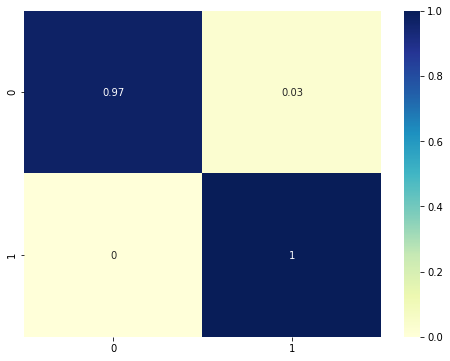

In [14]:
#visualise confusion matrix
size = (8, 6)
fig, ax = plt.subplots(figsize=size)
ax = sns.heatmap(cf.round(2),ax = ax, cmap="YlGnBu", annot=True)

In [15]:
cf

,0,1
0,0.965015,0.034985
1,0.000065,0.999935


In [16]:
accuracy_score(test_data.iloc[:,-1].values, prd78,normalize = 'true')

0.9984809641083613